# Scenario discovery - replication assignment
In this exercise, you will replicate the results from three influential papers in the field of decision-making under uncertainty. By working through these cases, you will gain hands-on experience in applying the Patient Rule Induction Method (PRIM) to identify policy vulnerabilities, develop Shared Socio-economic Pathways (SSPs), and design adaptive decision-making strategies.

Replicate the results found in:

1. [Bryant et al (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), which introduces the "scenario discovery" approach.
2. [Rozenberg et al (2014)](https://doi.org/10.1007/s10584-013-0904-3), which proposes a "backwards" approach to SSP development.
3. [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004), which presents an iterative computational model-based approach for adaptive decision-making.

The data files are in the [data](data) folder and named in line with the papers. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for these weeks. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://doi.org/10.1016/j.envsoft.2015.11.020), which gives a succinct summary of these three cases.

An additional useful, if dated, resource for Bryant et al is [Scenario discovery in Python](https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/) from the Water Programming blog.

You can use use the `%matplotlib notebook` [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) for interaction with the trade-off curves. You can revert back to inline with `%matplotlib inline`.

## 1. Bryant & Lempert
> Bryant and Lempert's ["Thinking inside the box"](https://doi.org/10.1016/j.techfore.2009.08.002) introduces "scenario discovery," a computer-assisted method for identifying policy vulnerabilities using statistical or data-mining algorithms on simulation data. The approach is demonstrated on a U.S. renewable energy policy problem, addressing challenges faced in public debates.

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the `peel_alpha` in [PRIM](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/prim.html). This controls the leniency of the algorithm.

In [4]:
from ema_workbench.analysis import prim
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df= pd.read_csv('data/Bryant et al 2010.csv')

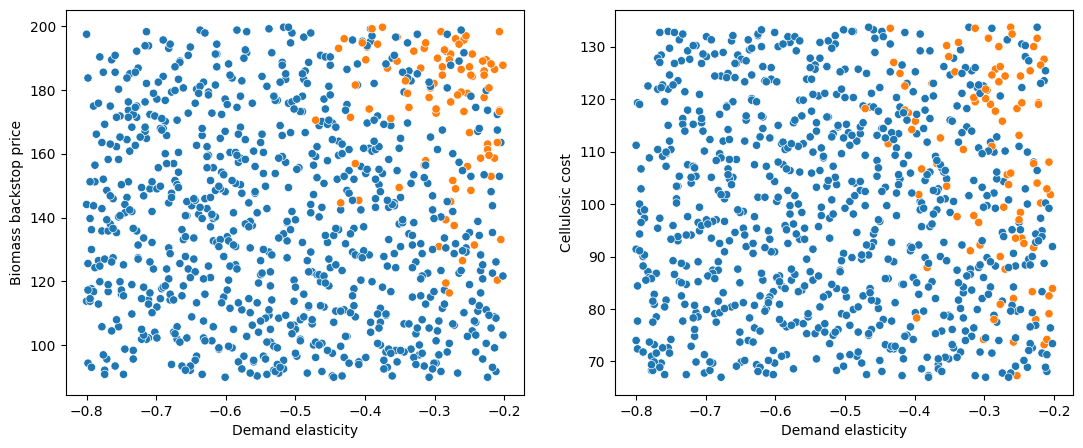

In [7]:
f, ax = plt.subplots(1,2,figsize=(13,5))

sns.scatterplot(data=df, x='Demand elasticity', y='Biomass backstop price', hue='Greater than 90%', legend=False, ax=ax[0])
sns.scatterplot(data=df, x='Demand elasticity', y='Cellulosic cost', hue='Greater than 90%', legend=False, ax=ax[1])
plt.show()

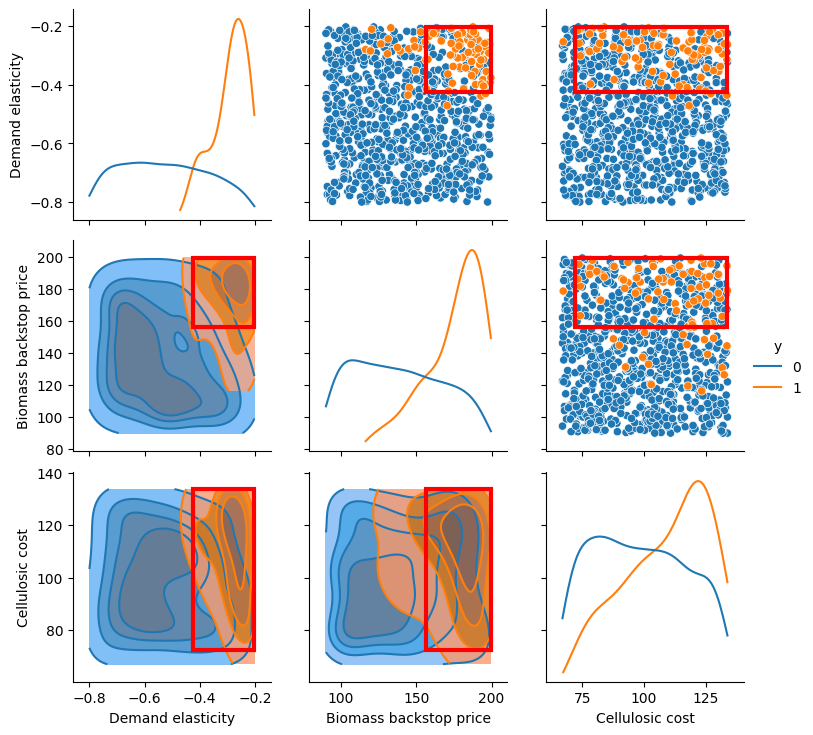

In [10]:
# The PRIM algorithm is implemented in the ema_workbench. You can use the prim function to run the algorithm. The function takes a dataframe, a list of input variables, and a list of output variables as arguments. The function returns a Prim object that contains the results of the analysis.
experiments = df.columns[2:11]

p = prim.Prim(df[experiments], df['Greater than 90%'], 0.5) #Only look for boxes where at least 50% of the data points in the box have the outcome True;  minimum density
 
     #You find the best peeling_alpha by plotting the trajectory of coverage and density for different indices and choosing the best 
    # peel_apha = How much data is peeled away at each step       

box = p.find_box()
#red box are the scenarios that meet the desired outcome requirements as selected by PRIM
    
    
box.show_pairs_scatter(dims=["Demand elasticity", "Biomass backstop price", "Cellulosic cost"])
plt.show()

## 2. Rozenberg et al
> In ["Building SSPs for climate policy analysis,"](https://doi.org/10.1007/s10584-013-0904-3) Rozenberg et al. propose a "backwards" approach to develop Shared Socio-economic Pathways (SSPs) using potential drivers of mitigation and adaptation challenges. The method aids in focusing storylines on the most relevant driving forces.

* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply PRIM separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM

In [22]:
df_roze = pd.read_csv('data/Rozenberg et al 2014.csv')
df_roze.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


In [23]:
experiments = df_roze.columns[0:7] #uncertainities columns
# Prepare input data
scenarios = df_roze[experiments]

Analyzing SSP1...


/Users/precupada/decision_making_assignments/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/Users/precupada/decision_making_assignments/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/Users/precupada/decision_making_assignments/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/Users/precupada/decision_making_assignments/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.

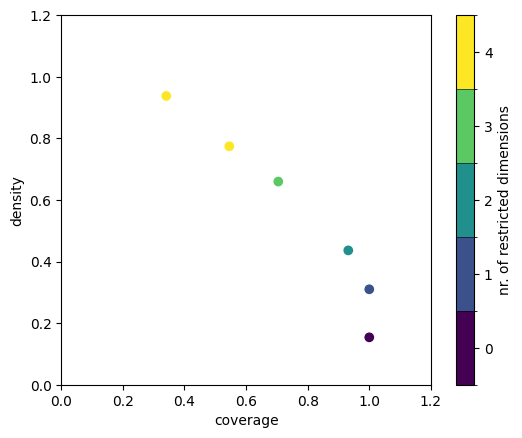

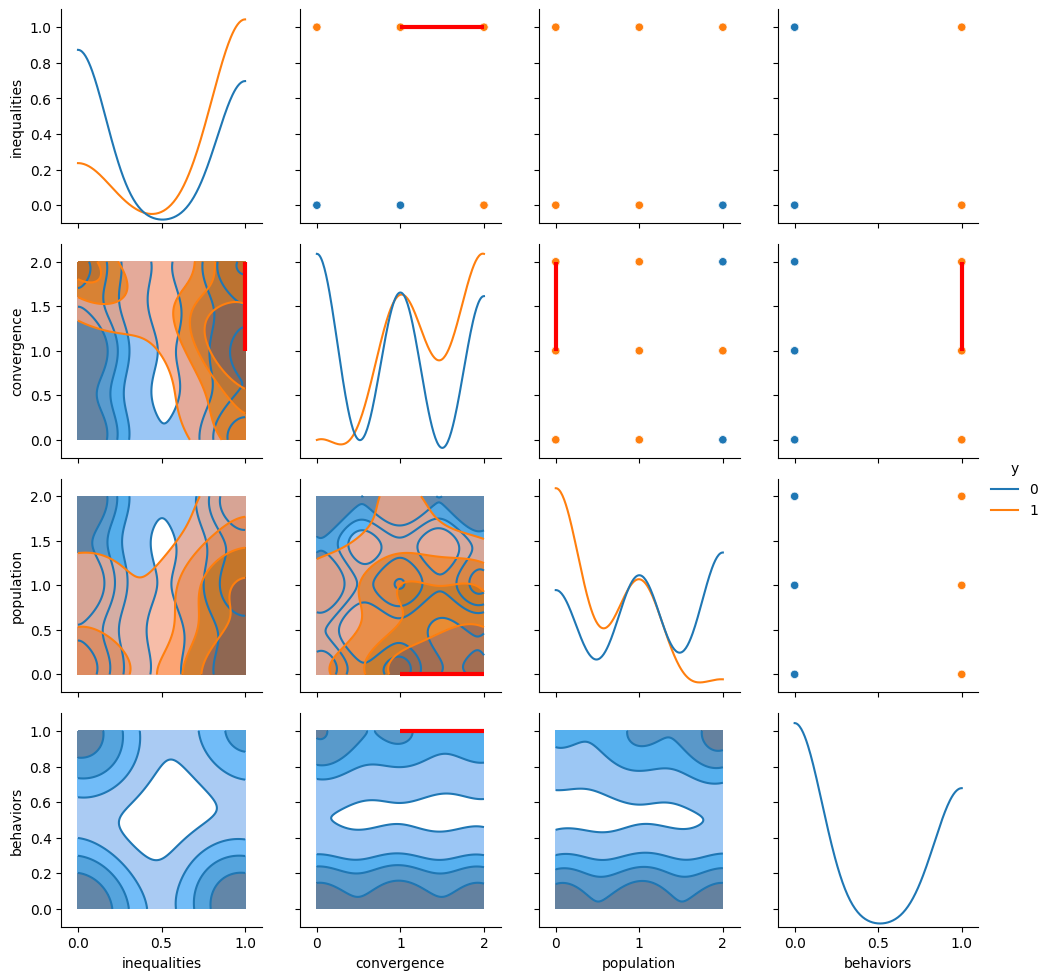

In [39]:
'''
Scenario discovery algorithm for SSP1
'''
print("Analyzing SSP1...")
y_ssp1 = df_roze['SSP1']  # Target outcome for SSP1
prim_ssp1 = prim.Prim(scenarios, y_ssp1, threshold=0.3, peel_alpha=0.01)  # #Treshold of 0.8 extracted from paper table SP4 equaling density; peel_alpha fixed by matching the tradeoff to the paper to have coverage around 0.5. ideally peel_alpha should be 0.05 but it takes a looot of time to process. better time around 0.1 
box_ssp1 = prim_ssp1.find_box()

box_ssp1.show_tradeoff()
#plot shows there is only one point with density > 80%, where coverage is about 0.5, at this point there are 4 restricted dimensions i.e. 4 dimensions need to be modified to fit the box to desired outcomes -> the important drivers for SSP1 are inequalities, convergence, population and behaviors 
box_ssp1.show_pairs_scatter()

#even though the coverage values don't fit perfectly to the paper, we get the same number of restricted dimensions and insights -> 
        # however the 4 restricted dimension we get seem to be different than the ones from the paper, even if threshold is lowered to 0.3
        #WHY?????

## 3. Hamarat et al
> Hamarat, Kwakkel, and Pruyt's ["Adaptive Robust Design under deep uncertainty"](https://doi.org/10.1016/j.techfore.2012.10.004) presents an iterative computational model-based approach for adaptive decision-making under uncertainty. The approach combines adaptive policy-making, simulation models, data mining, and robust optimization, with potential applications in long-term structural transformations.

This is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [ ]:
# To load the .gz file, you can use the load_results function
from ema_workbench import load_results
